<a href="https://colab.research.google.com/github/scudilio/Visualizacao_de_dados/blob/master/Scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#**Série: "Visualização de dados"**
##**Scatter plots: Um guia completo para gráficos de dispersão**

Os gráficos de dispersão ou Scatter plot são representações gráficas do relacionamento entre duas variáveis numéricas. O Scatter plot utiliza pontos para representar essa relação, cada ponto representa o valor de uma variável no eixo horizontal e o valor de outra variável no eixo vertical.





In [57]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving scartterplot.png to scartterplot.png


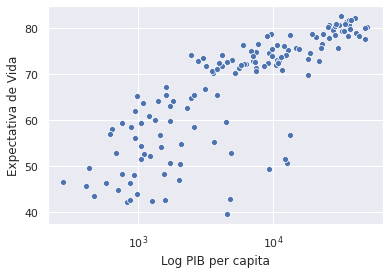

In [58]:
Image('scartterplot.png')

No gráfico acima temos o gráfico de dispersão do log do PIB (Produto Interno Bruto) per capita pela Expectativa de Vida. Cada ponto do gráfico apresenta o valor do logaritmo do PIB per capita de um país em relação a Expectativa de Vida do país. Observa-se, que quanto maior o PIB per capita, maior a expectativa de vida. Ou seja, existe uma correlação positiva entre essas variáveis (quanto uma variável aumenta a outra variável também aumenta).

##**Quando você deve usar um gráfico de dispersão?**

Descrito por Francis Galton, o Scatter plot é usado para verificar se existe uma relação entre causa e efeito entre duas variáveis numéricas. Isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação.
A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear. 



In [59]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving scatterplot.png to scatterplot.png


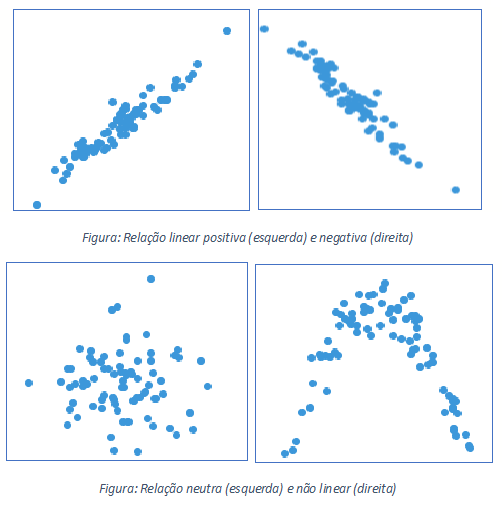

In [61]:
Image('scatterplot.png')

O gráfico de dispersão não mostra apenas o valor individualmente, mas mostra os dados como um todo. Sendo útil para identificar outro padrões nos dados, como outlier (pontos extremos) ou possíveis grupos entre os dados. 


In [5]:
from google.colab import files
from IPython.display import Image
uploaded=files.upload()

Saving outlier.png to outlier.png


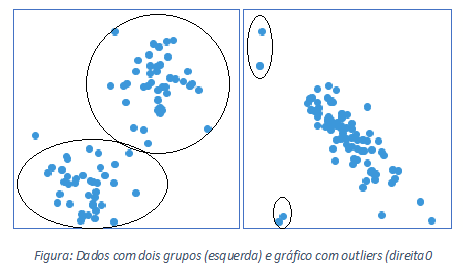

In [6]:
Image('outlier.png')


##**Exemplo de estrutura de dados**


Para criar gráficos de dispersão precisamos de um conjunto de dados, que tenha no mínimo duas variáveis numéricas (variáveis quantitativas). Aqui vamos utilizar o dataset ‘gapminder’. 
Esse conjunto de dados ficou muito famoso após a apresentação do Hans Rosling, um doutor e estatístico sueco que apresentava e ilustrava os dados através de uma história atraente (storytelling). 
Os dados gapminder resume informações da população e expectativa de vida dos países ao longo do tempo.

O conjunto de dados está disponível em 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'

In [2]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
##IMPORTANDO o dataset
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
df = pd.read_csv(url)
df.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


##**Diferentes tipos de Scatterplot**

 ##  **Bivariado**
O gráfico de dispersão mais comum é o bivariado, onde temos duas variáveis contínuas e buscamos entender a relação entre elas. Aqui utilizaremos a variável expectativa de vida e o logaritmo do PIB per capita.

Utilizamos a escala logarítmica, pois os dados do PIB per capita possui muito valores com alta variabilidadee e o logaritmo reduz a escala dos dados facilitando a visualização dos dados.

Para construir o Scatter plot utilizaremos a biblioteca 'plotly.express'. 'Plotly' é uma biblioteca de visualização de dados em Python, com ela é possível construir gráficos interativos de maneira simples e que são esteticamentes bonitos, como veremos a seguir


In [0]:
import plotly.express as px
fig=px.scatter(df, x='gdpPercap', y='lifeExp',log_x=True,width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que quanto maior o PIB per capita de um país maior é a expectativa de vida. Vale ressaltar, que nesse primeiro gráfico plotamos todos os anos juntos, a seguir, iremos filtrar e construir o gráfico do PIB per capita pela expectativa de vida considerando apenas para o ano de 2007.

In [0]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", hover_name="country", log_x=True, size_max=90,width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Novamente temos a mesma conclusão, quanto maior o PIB per capita, maior é a expectativa de vida. 

Agora, e se o interesse for analisar a relação do PIB per capita e expectativa de vida em cada continente?  

Podemos fazer três gráficos distintos, uma para cada continente, como mostramos a seguir

In [0]:
import plotly.express as px
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp",  hover_name="country", log_x=True, size_max=60,facet_col='continent')
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe, que na África temos os piores índices de PIB per capita e expectativa de vida e a Europa é onde temos os melhores índices. 

Porém, fica difícil comparar a relação entre os continentes, para resolver esse problema podemos resumir esses gráficos em um só, apenas acrescentando uma variável a mais.



## **Scatterplot com três variáveis**

Uma variação comum do Scatter plot é a adição de uma terceira variável, o acréscimo de uma terceira variável traz mais informações para o gráfico. A terceira variável pode ser categórica ou numérica. Veremos esses dois casos a seguir.

* **Variável Categórica**

Para uma terceira variável que possui valores categóricos (como continente), o mais comum é incluir cor aos pontos, onde cada cor irá associar a um grupo diferente. 

In [65]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", color="continent", 
               hover_name="country", log_x=True, width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Acrescentando a variável continente, observa-se que os paises com menores PIB per capita e expectativa de vida são os paises da África. E os paises com as maiores expectativas de vidas e PIB per capita são da Europa em sua maioria. Vale ressaltar que existe alguns pontos discrepantes, que mesmo com um PIB per capita mediano possui baixa expectativa de vida, como a África do Sul e Gabon.

Uma outra maneira de representar uma variável categórica num gráfico de dispersão é utilizando símbolos, porém fica mais difícil a visualização.

In [0]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", symbol="continent", hover_name="country", log_x=True, size_max=60,width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Podemos também utilizar as cores e símbolos

In [0]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", symbol="continent",color='continent', hover_name="country", log_x=True, size_max=60,width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

* **Variável Numérica**

Quando temos uma terceira variável numérica, como população, uma variação comum do Scatter plot é em relação ao tamanho dos pontos. Esses gráficos são conhecidos como gráficos de bolhas, onde pontos maiores indicam valores mais altos.


In [0]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", size="pop", color="pop", 
               hover_name="country", log_x=True, size_max=60, width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

Observe que os pontos maiores refere-se a população da China e da Índia.


#**Scatter plot com 4 variáveis**

E por último podemos visualizar esse gráfico utilizando 4 variáveis, 3 v variáveis numéricas e 1 variável categórica

In [0]:
df_2007 = df[df["year"]==2007]
fig=px.scatter(df_2007, x="gdpPercap", y="lifeExp", size="pop", color="continent", hover_name="country", log_x=True, size_max=60,width=800)
fig.update_layout(title='PIB per capita X Expectativa de vida no ano de 2007')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()


Também podemos fazer a versão 3D desse gráfico, como mostramos a seguir

In [0]:
df_2007 = df[df["year"]==2007]
px.scatter_3d(df_2007, x="gdpPercap", y="lifeExp", z="pop", color="continent", hover_name="country", log_x=True,log_z=True)


Apesar dos gráficos 3d serem uma opção de gráfico de dispersão, eles não são recomendados. Como podemos ver, gráficos 3d são difíceis de serem interpretados e visualizados, podendo levar a conclusão errôneas. Logo, evite gráficos 3d

##**Scatter plot Animado**

O gráfico de dispersão animado é uma opção que podemos fazer quando temos uma variável temporal. No dataset Gapminder temos a variável ano, que mostra o PIB per capita e a Expectativa de vida ao longo do tempo.

Utilizaremos essa variável para dar animação para o gráfico, ou seja, para cada ano iremos plotar um gráfico de Scatter plot com 4 variáveis (PIB per capita, Expectativa de vida, Continente e População).

In [0]:

px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", log_x = True, width=900,
           size_max=60, range_x=[100,100000], range_y=[25,90])

## **Principais problemas ao utilizar gráficos de dispersão**

###**Overplotting**

Quando temos muitos dados a serem plotados, os pontos podem se sobrepor a um grau que fica difícil ver a relações entre as variáveis. Existem algumas maneiras de resolver esse problema, uma das alternativas é plotar apenas uma subconjunto dos dados, uma amostra aleatória deve fornecer a idéia geral dos padrões dos dados.

A segunda alternativa é utilizar transparência nos pontos, permitindo que as sobreposições sejam visíveis.

In [7]:
fig=px.scatter(df, x='gdpPercap',opacity=0.5, y='lifeExp',log_x=True,width=800,)
fig.update_layout(title='PIB per capita X Expectativa de vida')
fig.update_xaxes(title='PIB per capita')
fig.update_yaxes(title='Expectativa de vida')
fig.show()

###**Interpretar correlação como causalidade**


"*Correlação não implica causalidade*"

O problema aqui não é o gráfico em si, mas a sua interpretação. Observar uma relação entre duas variáveis em um gráfico de dispersão, não implica que a mudança em uma variável é responsável pela mudança na outra variável. 

 

É possível que exista uma terceira variável influenciando as duas variáveis plotadas ou que o padrão seja mera coincidência. Por isso, cuidado com a interpretação.

##**Conclusão**

Gráficos de dispersão ou Scatter plot são utilizados para analisar relações entre duas variáveis numéricas. Nesse artigo abordamos diversas variações desse tipo de gráfico e também discutimos alguns problemas desses tipos de gráficos.

Além disso, utilizamos a biblioteca plotly do Python para construir gráficos mais agradáveis esteticamente e de maneira simples.

Gostou desse artigo? Qual outra variável do gráfico de dispersão você conhece?

# **Referências**

https://towardsdatascience.com/recreating-gapminder-animation-in-2-lines-of-python-with-plotly-express-2060c73bedec

https://chartio.com/learn/charts/what-is-a-scatter-plot/